In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [174]:
df=pd.read_csv('/content/breast-cancer.csv')
df=df.drop(['id','Unnamed: 32'],axis=1)
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1}).astype(int)
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
177,0,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,...,17.79,28.45,123.50,981.2,0.1415,0.4667,0.58620,0.20350,0.3054,0.09519
366,0,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,...,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632
432,0,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,...,22.03,25.07,146.00,1479.0,0.1665,0.2942,0.53080,0.21730,0.3032,0.08075
41,0,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606
45,0,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185
75,0,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387
452,1,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
464,1,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
390,1,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,...,11.38,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722
375,1,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960


In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=42)

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [177]:
def knn(x_train,x_test,y_train,y_test):
  global knn_reg
  global knn_pred
  knn_reg=KNeighborsClassifier(n_neighbors=5)
  knn_reg.fit(x_train,y_train)
  knn_pred=knn_reg.predict(x_test)
  print(confusion_matrix(y_test,knn_pred))
  print(accuracy_score(y_test,knn_pred))
  print(classification_report(y_test,knn_pred))

In [178]:
def nb(x_train,x_test,y_train,y_test):
  global nb_reg
  global nb_pred
  nb_reg=GaussianNB()
  nb_reg.fit(x_train,y_train)
  nb_pred=nb_reg.predict(x_test)
  print(confusion_matrix(y_test,nb_pred))
  print(accuracy_score(y_test,nb_pred))
  print(classification_report(y_test,nb_pred))

In [179]:
def lr(x_train,x_test,y_train,y_test):
  global lr_reg
  global lr_pred
  lr_reg=LogisticRegression()
  lr_reg.fit(x_train,y_train)
  lr_pred=lr_reg.predict(x_test)
  print(confusion_matrix(y_test,lr_pred))
  print(accuracy_score(y_test,lr_pred))
  print(classification_report(y_test,lr_pred))

In [180]:
def dt(x_train,x_test,y_train,y_test):
  global dt_reg
  global dt_pred
  dt_reg=DecisionTreeClassifier(criterion='entropy')
  dt_reg.fit(x_train,y_train)
  dt_pred=dt_reg.predict(x_test)
  print(confusion_matrix(y_test,dt_pred))
  print(accuracy_score(y_test,dt_pred))
  print(classification_report(y_test,dt_pred))

In [181]:
def rf(x_train,x_test,y_train,y_test):
  global rf_reg
  global rf_pred
  rf_reg=RandomForestClassifier(criterion='entropy',n_estimators=5)
  rf_reg.fit(x_train,y_train)
  rf_pred=dt_reg.predict(x_test)
  print(confusion_matrix(y_test,rf_pred))
  print(accuracy_score(y_test,rf_pred))
  print(classification_report(y_test,rf_pred))

In [182]:
def adab(x_train,x_test,y_train,y_test):
  global adab_reg
  global adab_pred
  lr=LogisticRegression()
  adab_reg=AdaBoostClassifier(estimator=lr,n_estimators=5)
  adab_reg.fit(x_train,y_train)
  adab_pred=dt_reg.predict(x_test)
  print(confusion_matrix(y_test,adab_pred))
  print(accuracy_score(y_test,adab_pred))
  print(classification_report(y_test,adab_pred))

In [183]:
def gb(x_train,x_test,y_train,y_test):
  global gb_reg
  global gb_pred
  gb_reg=GradientBoostingClassifier(n_estimators=5)
  gb_reg.fit(x_train,y_train)
  gb_pred=gb_reg.predict(x_test)
  print(confusion_matrix(y_test,gb_pred))
  print(accuracy_score(y_test,gb_pred))
  print(classification_report(y_test,gb_pred))

In [184]:
def xgb(x_train,x_test,y_train,y_test):
  global xgb_reg
  global xgb_pred
  xgb_reg=XGBClassifier(n_estimators=5)
  xgb_reg.fit(x_train,y_train)
  xgb_pred=dt_reg.predict(x_test)
  print(confusion_matrix(y_test,xgb_pred))
  print(accuracy_score(y_test,xgb_pred))
  print(classification_report(y_test,xgb_pred))

In [185]:
def svm(x_train,x_test,y_train,y_test):
  global svm_reg
  global svm_pred
  svm_reg=XGBClassifier(n_estimators=5)
  svm_reg.fit(x_train,y_train)
  svm_pred=dt_reg.predict(x_test)
  print(confusion_matrix(y_test,svm_pred))
  print(accuracy_score(y_test,svm_pred))
  print(classification_report(y_test,svm_pred))

In [186]:
def common(x_train,x_test,y_train,y_test):
  print('------knn------')
  knn(x_train,x_test,y_train,y_test)
  print('-----nb-----')
  nb(x_train,x_test,y_train,y_test)
  print('------lr-----')
  lr(x_train,x_test,y_train,y_test)
  print('----dt-----')
  dt(x_train,x_test,y_train,y_test)
  print('-----rf------')
  rf(x_train,x_test,y_train,y_test)
  print('------adab------')
  adab(x_train,x_test,y_train,y_test)
  print('-------gb------')
  gb(x_train,x_test,y_train,y_test)
  print('-----xgb------')
  xgb(x_train,x_test,y_train,y_test)
  print('------svm-----')
  svm(x_train,x_test,y_train,y_test)

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
common(x_train,x_test,y_train,y_test)

------knn------
[[38  5]
 [ 0 71]]
0.956140350877193
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

-----nb-----
[[40  3]
 [ 0 71]]
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------lr-----
[[39  4]
 [ 1 70]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy               

# AUC & ROC

In [189]:
# Area under the curve
# ROC (Rectifier Operating Characterstic)

In [190]:
from sklearn.metrics import roc_auc_score,roc_curve

In [191]:
knn_fpr,knn_tpr,knn_th=roc_curve(y_test,knn_pred)
nb_fpr,nb_tpr,nb_th=roc_curve(y_test,nb_pred)
lr_fpr,lr_tpr,lr_th=roc_curve(y_test,lr_pred)
dt_fpr,dt_tpr,dt_th=roc_curve(y_test,dt_pred)

rf_fpr,rf_tpr,rf_th=roc_curve(y_test,rf_pred)
adab_fpr,adab_tpr,adab_th=roc_curve(y_test,adab_pred)
gb_fpr,gb_tpr,gb_th=roc_curve(y_test,gb_pred)
xgb_fpr,xgb_tpr,xgb_th=roc_curve(y_test,xgb_pred)

svm_fpr,svm_tpr,svm_th=roc_curve(y_test,svm_pred)

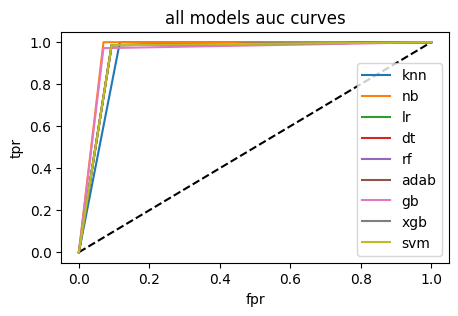

In [192]:
from matplotlib import legend
plt.figure(figsize=(5,3))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('all models auc curves')

plt.plot(knn_fpr,knn_tpr,label='knn')
plt.plot(nb_fpr,nb_tpr,label='nb')
plt.plot(lr_fpr,lr_tpr,label='lr')
plt.plot(dt_fpr,dt_tpr,label='dt')

plt.plot(rf_fpr,rf_tpr,label='rf')
plt.plot(adab_fpr,adab_tpr,label='adab')
plt.plot(gb_fpr,gb_tpr,label='gb')
plt.plot(xgb_fpr,xgb_tpr,label='xgb')

plt.plot(svm_fpr,svm_tpr,label='svm')

plt.legend(loc = 0)
plt.show()
